
# **Predicting Heart Failure using Machine Learning ( Artificial Neural Network-ANN)**
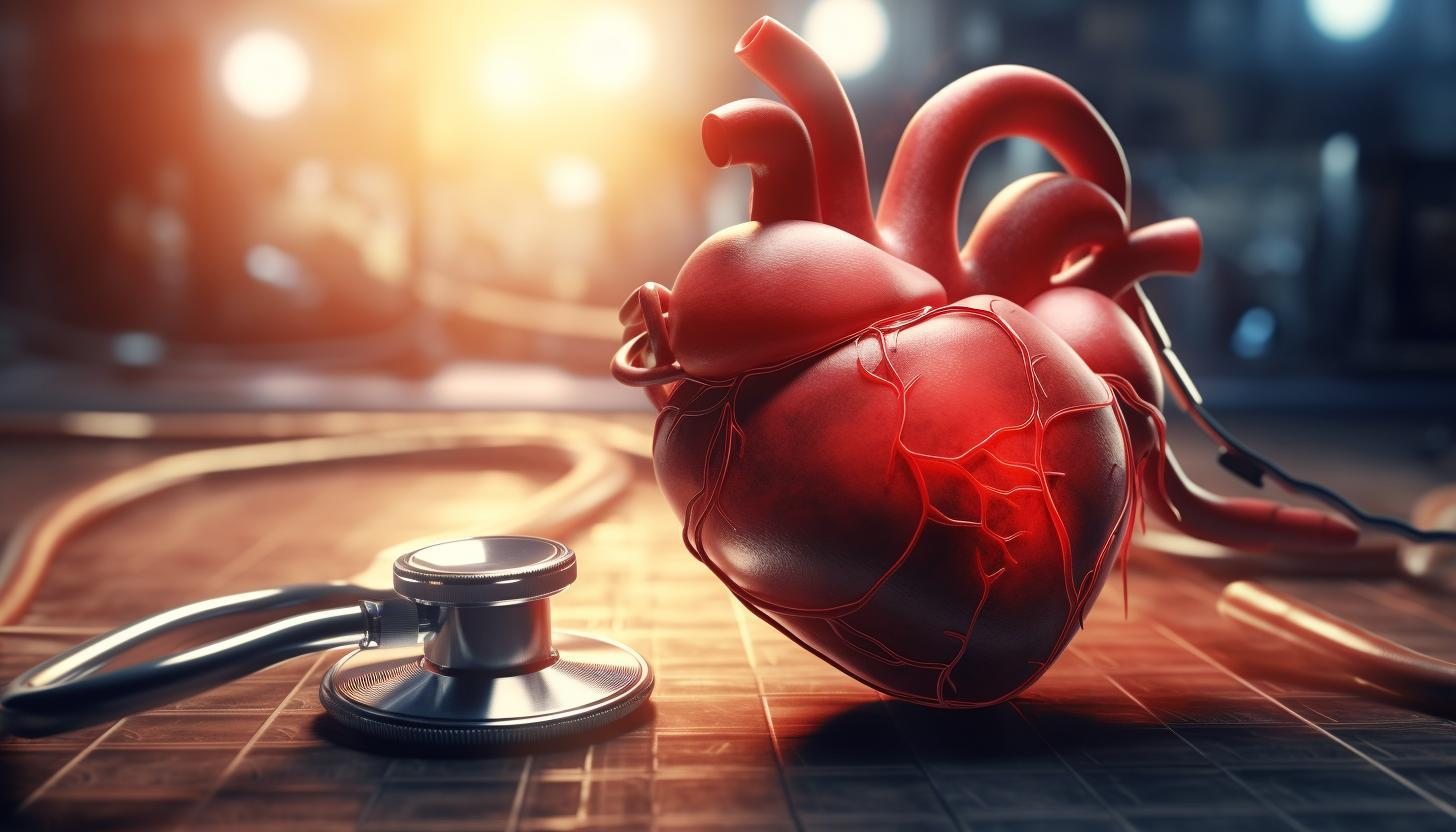




# 1- Problem:
In this project, we delve into a dataset encapsulating various health metrics from heart patients, including age, blood pressure, heart rate, and more. Our goal is to develop a predictive model capable of accurately identifying individuals with heart disease. Given the grave implications of missing a positive diagnosis, our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric.
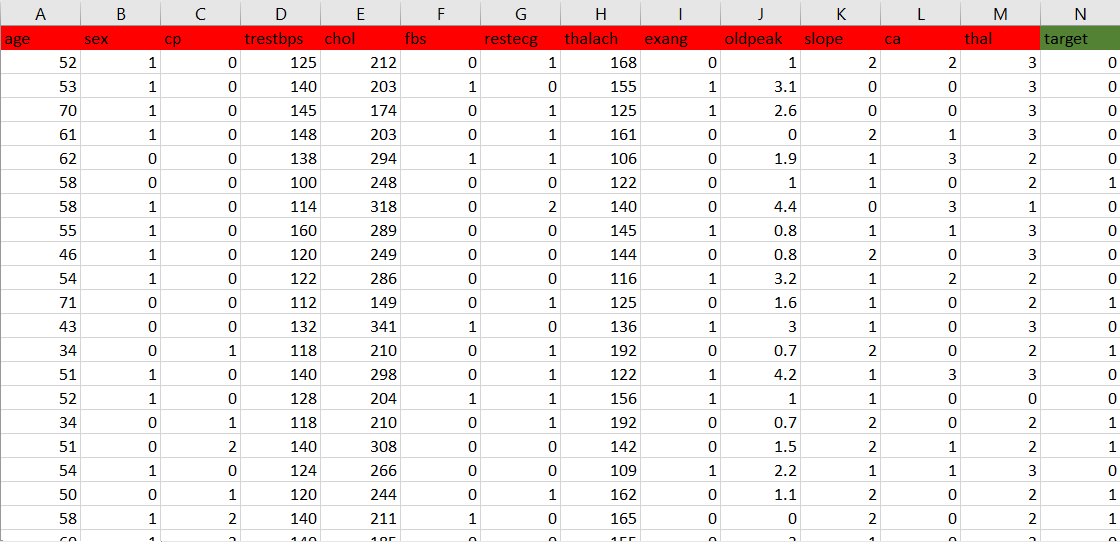

# Objectives:
1- Explore the Dataset: Uncover patterns, distributions, and relationships within the data.
Conduct Extensive Exploratory Data Analysis (EDA): Dive deep into bivariate relationships against the target.

2- Preprocessing Steps: Address missing values, Treat outliers, Encode categorical variables, Dataset spliting


3- Model Building:
1.	Design Artificial Neural Network Architecture (ANN):
•	Create a simple structure with input, hidden, and output layers and specify activation functions using TensorFlow-Keras.
2.	Model Compilation:
•	Define the loss function , optimizer, and evaluation metrics.
3.	Model Training:
•	Determine epochs and batch size.
•	Use TensorFlow-Keras to train the neural network on the dataset.
•	Understanding forward and backword propagation
4.	Model Testing:
•	Evaluate the trained model on new data.
•	Analyze performance metrics to validate effectiveness.


# Explore the Dataset
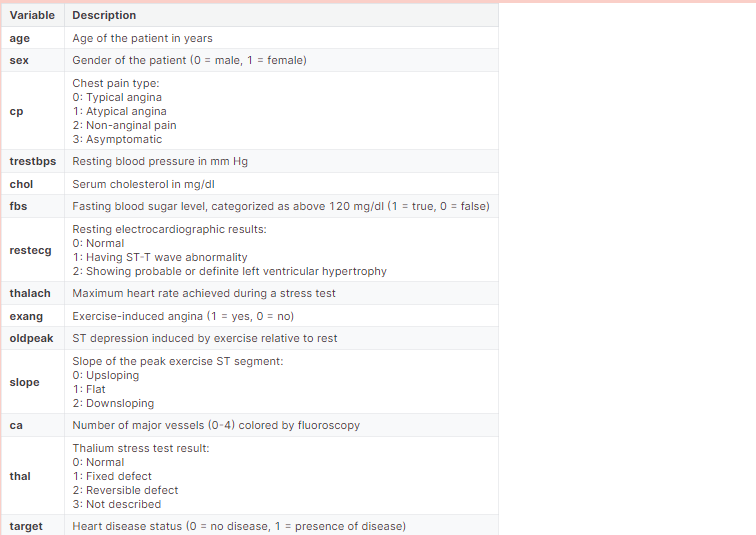

# Step 1 Import Libraries

In [2]:
import pandas as pd  # Import pandas library for data manipulation and analysis
import numpy as np  # Import numpy library for numerical computing
from keras.models import Sequential  # Import Sequential class from keras.models module for creating a sequential model
from keras.layers import Dense  # Import Dense class from keras.layers module for adding fully connected layers
from sklearn.model_selection import train_test_split  # Import train_test_split function from sklearn.model_selection module for splitting data into training and testing sets
import matplotlib.pyplot as plt  # Import pyplot submodule from matplotlib library for plotting
from sklearn.preprocessing import RobustScaler  # Import RobustScaler class from sklearn.preprocessing module for robust scaling
import sklearn.metrics as sm  # Import metrics submodule from sklearn module for evaluating model performance


# Step 1: Load your dataset
- Import the necessary libraries: Pandas and NumPy.
- Load your dataset from a CSV file using Pandas' read_csv() function.
- Store the dataset in a Pandas DataFrame.

# Let's buy the materials, and start the exam study ❤

In [4]:
data = pd.read_csv('Heart Failure.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Step 2 Dataset Basic Information

In [4]:
# Display a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Inferences:
1. Number of Entries: The dataset consists of 303 entries, ranging from index 0 to 302.
2. Columns: There are 14 columns in the dataset corresponding to various attributes of the patients and results of tests.
3. Data Types:
Most of the columns (13 out of 14) are of the int64 data type.
Only the oldpeak column is of the float64 data type.



# Step 3 Handling Missing Value

Let's prepare the material before starting the study. Let's go ⛹

In [5]:
# Check for missing values in the dataset
data.isnull().sum().sum()

0

Missing Values: There don't appear to be any missing values in the dataset

# Step 4 Summary Statistics for Dataset's Variables


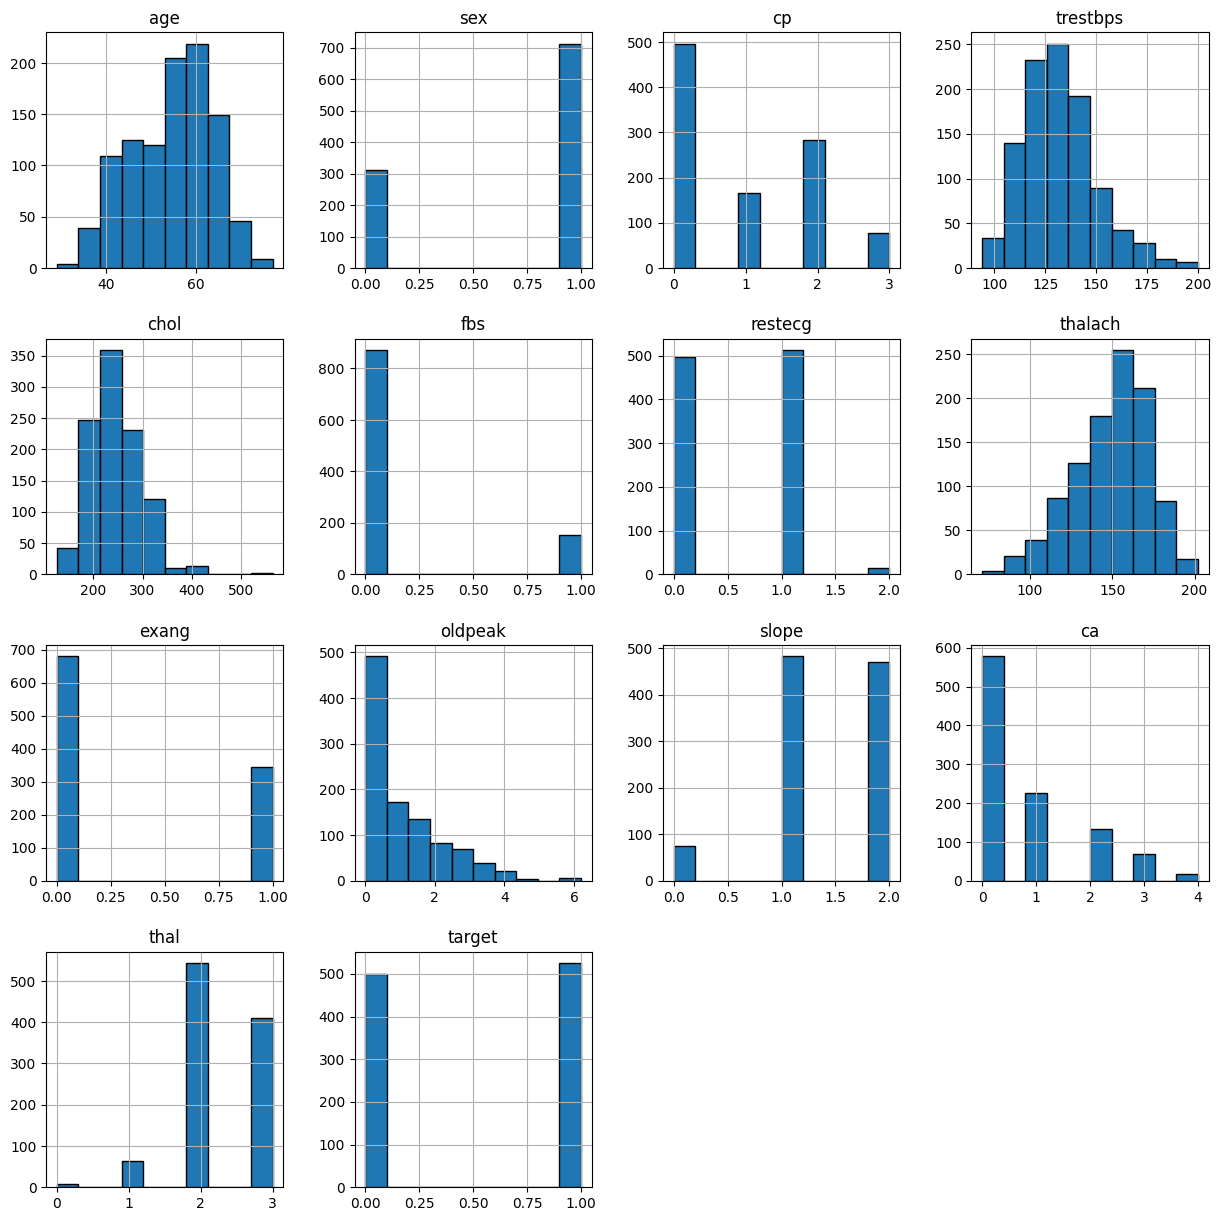

In [6]:
data.hist(figsize=(15,15),edgecolor='black');


1. Numerical Features: age, trestbps,chol,thalach,oldpeak
2. Categorical  Features: cp,slope, thal, restecg, ca, Target

# Step 5 : Split dataset to Features and Target ( X , Y ) In mathmatical Language

# Y=bX+c

In [8]:
y = data['target']
X = data.drop(['target'], axis = 1)

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


# Step 5 : Handling Categorical data ( using Encoding)
# Step 6 : Handling Numerical data ( using scaling)


1. Feature Scaling: Scale numerical features to a similar range to speed up the training process.

2. Feature Encoding: Encode categorical features into numerical representations, commonly using one-hot encoding , label encoding, dummies encoding.


In [55]:
# Step 1: Define numerical and categorical column names
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']




# Step 3: Preprocess categorical columns (create dummy variables)
X_categorical_dummies = pd.get_dummies(X,columns = ['cp', 'slope', 'thal', 'restecg', 'ca'], drop_first=True)




# Scale each numerical column in the dataset and replace the original values
scaler = RobustScaler()
for col in numerical_cols:
    X_categorical_dummies[col] = scaler.fit_transform(X_categorical_dummies[[col]])

X_final=X_categorical_dummies

X_final.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,slope_2,thal_1,thal_2,thal_3,restecg_1,restecg_2,ca_1,ca_2,ca_3,ca_4
0,-0.307692,1,-0.25,-0.437500,0,0.470588,0,0.111111,0,0,...,1,0,0,1,1,0,0,1,0,0
1,-0.230769,1,0.50,-0.578125,1,0.088235,1,1.277778,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.076923,1,0.75,-1.031250,0,-0.794118,1,1.000000,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.384615,1,0.90,-0.578125,0,0.264706,0,-0.444444,0,0,...,1,0,0,1,1,0,1,0,0,0
4,0.461538,0,0.40,0.843750,1,-1.352941,0,0.611111,0,0,...,0,0,1,0,1,0,0,0,1,0


# Step 7 Split dataset to Train/Test

Train-Test Split: Split the dataset into training and testing sets to evaluate model performance.

1. Train for studying ( Students )
2. Test for Exam ( Teacher )

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y,  test_size=0.20,random_state=0)


# Implementing the Artificial Neural Network (ANN) architecture

An Artificial Neural Network (ANN) is a computational model inspired by the structure and function of biological neural networks in the human brain. It is composed of interconnected nodes, called neurons, organized in layers. ANN is a fundamental concept in machine learning and is widely used for various tasks, including classification, regression, clustering, and pattern recognition.

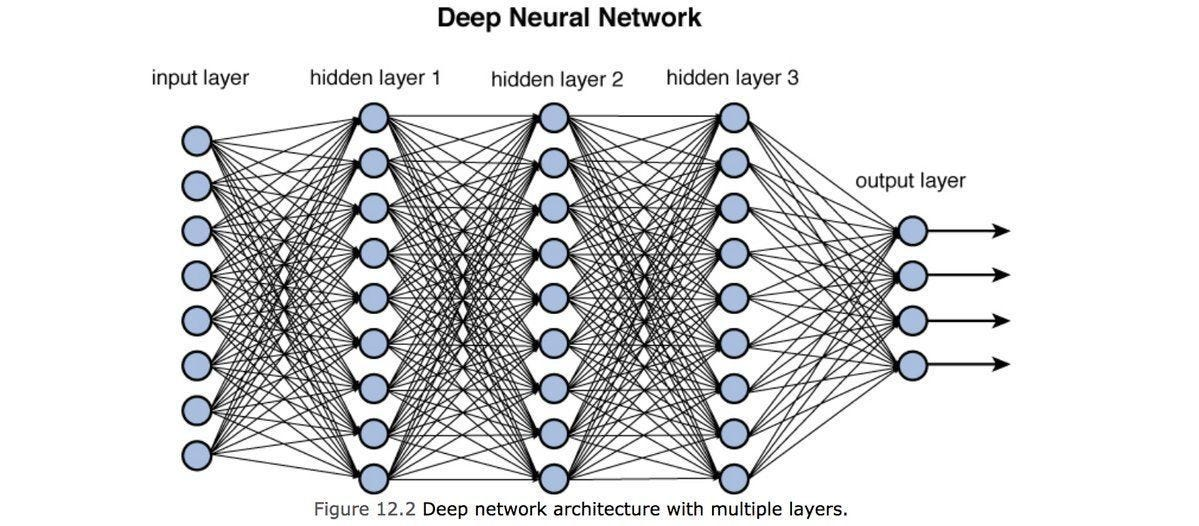



In [57]:
model = Sequential()
model.add(Dense(64, input_dim=22,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
# # model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


# compiling
In the context of deep learning and neural networks, compiling refers to the process of configuring the model for training. When you compile a model, you specify the loss function, optimizer, and optionally, evaluation metrics. This configuration defines how the model will learn from the training data and how it will evaluate its performance during training.

In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


 # Time to Study : ( using Fit )

 After compiling the model, it is ready to be trained on the training data using the fit() method. During training, the model will minimize the specified loss function using the chosen optimizer and will track the specified evaluation metrics to monitor performance.

Epoch 1/20
37/37 [==============================] - 1s 5ms/step - loss: 0.6336 - accuracy: 0.7073 - val_loss: 0.5577 - val_accuracy: 0.7683
Epoch 2/20
37/37 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.8211 - val_loss: 0.4213 - val_accuracy: 0.8537
Epoch 3/20
37/37 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8509 - val_loss: 0.3715 - val_accuracy: 0.8415
Epoch 4/20
37/37 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8821 - val_loss: 0.3660 - val_accuracy: 0.8293
Epoch 5/20
37/37 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.8902 - val_loss: 0.3484 - val_accuracy: 0.8293
Epoch 6/20
37/37 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9079 - val_loss: 0.3400 - val_accuracy: 0.8537
Epoch 7/20
37/37 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9173 - val_loss: 0.2974 - val_accuracy: 0.8659
Epoch 8/20
37/37 [==

[]

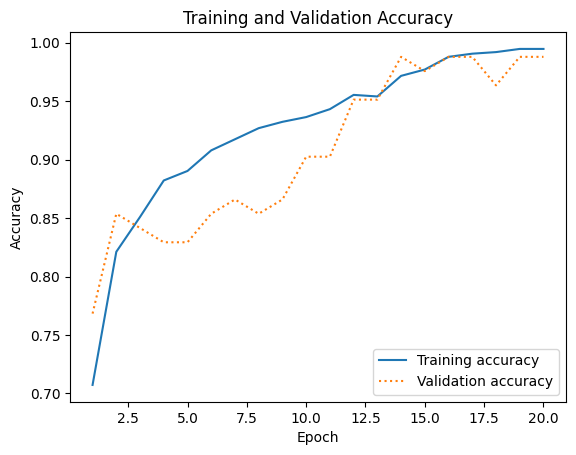

In [59]:
his=model.fit(X_train, y_train, epochs=20,batch_size=20, validation_split=0.1)

"""
Ploting
"""
# import seaborn as sns
# sns.set()
acc = his.history['accuracy']
val = his.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# Exam Time

In [60]:

y_pred = model.predict(X_test)

threshold = 0.5

binary_predictions = np.where(y_pred > threshold, 1, 0)


print("R2 score =", abs(round(sm.r2_score(y_test ,binary_predictions), 4)))


7/7 [==============================] - 0s 1ms/step
R2 score = 0.9609
